In [3]:
%load_ext autoreload
%autoreload 2

import networkx as nx
import numpy as np
from typing import List, Callable
from numbers import Number
from math import log2
import matplotlib.pyplot as plt

from pprint import pprint

from src.interleavers import FixedPermuteInterleaver
from src.encoders import conv_75_1_00, turbo_755_1_00, conv_16_5_11, turbo_155_7_00, turboae_binary_exact_nobd
from src.graphs import (
    greedy_ordering, 
    compute_elimination_factors, 
    build_cluster_tree, 
    prune_cluster_tree, 
    check_cluster_tree, 
    min_weight, 
    InferenceGraph, 
    general_convolutional_code, 
    general_turbo_graph, 
    nonrecursive_convolutional_code, 
    nonrecursive_turbo_graph, 
    nonrecursive_dependency_convolutional_code, 
    nonrecursive_dependency_convolutional_factors, 
    nonrecursive_dependency_turbo_graph, 
    recursive_dependency_convolutional_code, 
    recursive_dependency_turbo_graph,
    infer_depencies,
)



Graph is chordal: True


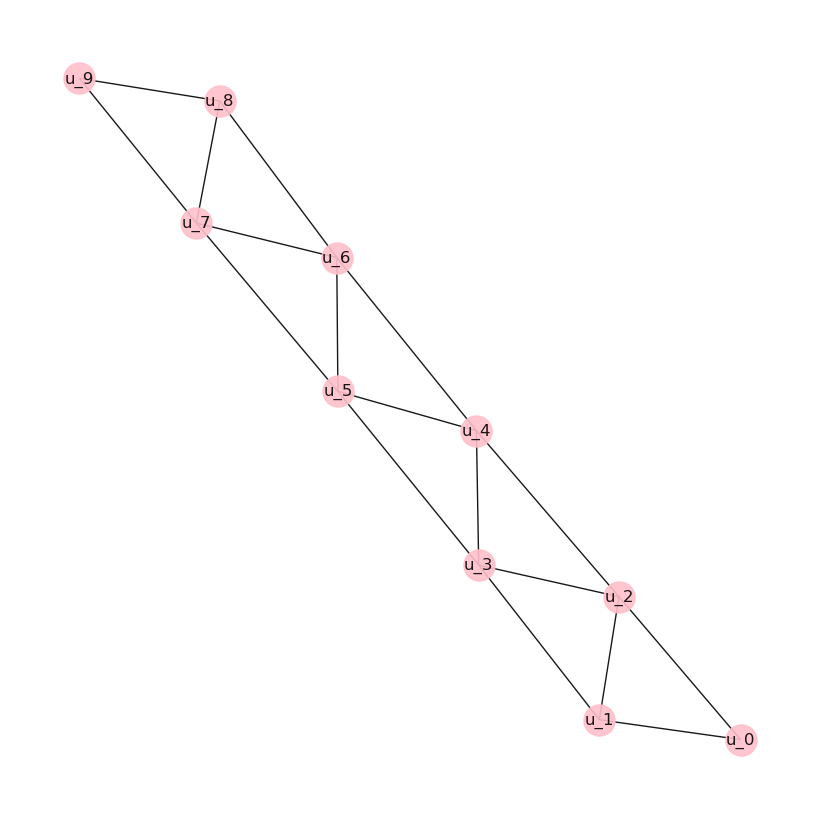

In [2]:
length=10
encoder = conv_75_1_00(num_steps=length)
c_inference_graph = nonrecursive_dependency_convolutional_code(length=length, dependencies=encoder.generator)
print(f"Graph is chordal: {c_inference_graph.is_chordal()}")
c_graph = c_inference_graph.graph

plt.figure(figsize=(8,8)) 
pos = nx.spring_layout(c_graph)
nx.draw(c_graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: node for node in c_graph.nodes()})

Graph was already chordally complete, max factor weight is 3.


{(0, 1): Text(0.8670114739088857, 0.1410433651630617, "{'u_1', 'u_2'}"),
 (1, 2): Text(0.6168436394042425, 0.034064910118233684, "{'u_3', 'u_2'}"),
 (2, 3): Text(0.3232955195122988, -0.052100387506885434, "{'u_3', 'u_4'}"),
 (3, 4): Text(0.008205640576662412, -0.09878087739929015, "{'u_5', 'u_4'}"),
 (4, 5): Text(-0.31037498196655317, -0.09624890649922739, "{'u_6', 'u_5'}"),
 (5, 6): Text(-0.6141102260817111, -0.055193403722370346, "{'u_7', 'u_6'}"),
 (6, 7): Text(-0.8799320114546313, 0.007305928843051141, "{'u_8', 'u_7'}")}

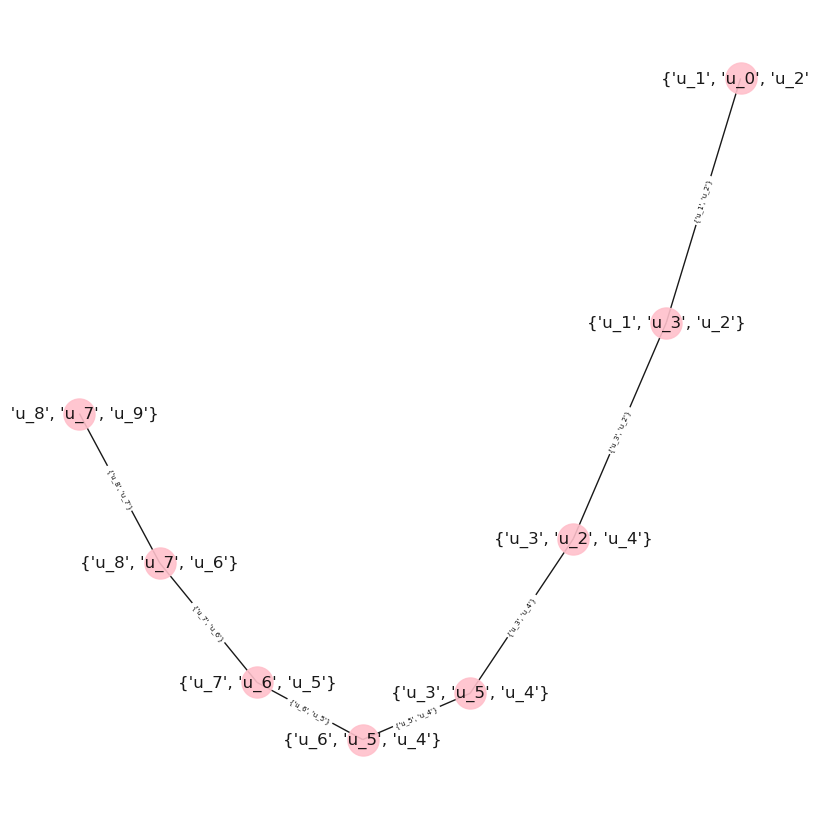

In [3]:
c_tree = c_inference_graph.with_elimination_ordering().as_cluster_tree().graph

plt.figure(figsize=(8,8)) 
pos = nx.spring_layout(c_tree)
nx.draw(c_tree, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: c_tree.nodes[node]["variables"] for node in c_tree.nodes()})
nx.draw_networkx_edge_labels(c_tree, pos, edge_labels={edge: c_tree.edges[edge]["intersection"] for edge in c_tree.edges()}, font_size=5)

tensor([[1, 0, 1],
        [1, 1, 0]], dtype=torch.int8)
tensor([1, 0, 1], dtype=torch.int8)
{'ff_0': {'u_0', 'f_0'},
 'ff_1': {'u_1', 'f_1'},
 'ff_2': {'u_2', 'f_0', 'f_2'},
 'ff_3': {'f_1', 'u_3', 'f_3'},
 'ff_4': {'f_4', 'f_2', 'u_4'},
 'ff_5': {'f_5', 'u_5', 'f_3'},
 'ff_6': {'f_6', 'f_4', 'u_6'},
 'ff_7': {'u_7', 'f_5', 'f_7'},
 'ff_8': {'f_6', 'u_8', 'f_8'},
 'ff_9': {'f_9', 'u_9', 'f_7'},
 'y_c0_0': {'u_0'},
 'y_c0_1': {'u_1'},
 'y_c0_2': {'u_2'},
 'y_c0_3': {'u_3'},
 'y_c0_4': {'u_4'},
 'y_c0_5': {'u_5'},
 'y_c0_6': {'u_6'},
 'y_c0_7': {'u_7'},
 'y_c0_8': {'u_8'},
 'y_c0_9': {'u_9'},
 'y_c1_0': set(),
 'y_c1_1': {'f_0'},
 'y_c1_2': {'f_1', 'f_0'},
 'y_c1_3': {'f_1', 'f_2'},
 'y_c1_4': {'f_2', 'f_3'},
 'y_c1_5': {'f_4', 'f_3'},
 'y_c1_6': {'f_4', 'f_5'},
 'y_c1_7': {'f_6', 'f_5'},
 'y_c1_8': {'f_6', 'f_7'},
 'y_c1_9': {'f_8', 'f_7'}}
Graph is chordal: True


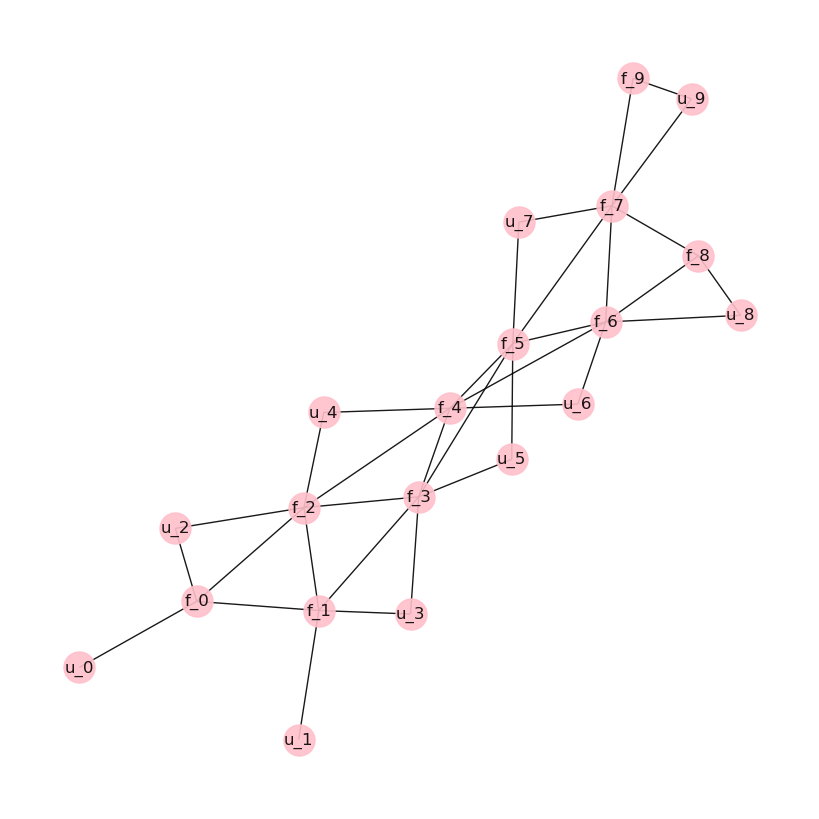

In [9]:
num_steps = 4
encoder = conv_16_5_11(num_steps=num_steps)
nonrecursive_dependencies = infer_depencies(encoder.table)
recursive_dependencies = infer_depencies(encoder.feedback[:, None])[0]
print(nonrecursive_dependencies)
print(recursive_dependencies)
c_inference_graph = recursive_dependency_convolutional_code(
    length=10, 
    nonrecursive_dependencies=nonrecursive_dependencies, 
    recursive_dependencies=recursive_dependencies,
    systematic=True
)
pprint(c_inference_graph.factor_groups)
print(f"Graph is chordal: {c_inference_graph.is_chordal()}")
c_graph = c_inference_graph.graph

plt.figure(figsize=(8,8)) 
pos = nx.spring_layout(c_graph)
nx.draw(c_graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: node for node in c_graph.nodes()})

Graph was already chordally complete, max factor weight is 3.


{(0, 2): Text(0.09910095140348976, -0.643051507063628, "{'f_0'}"),
 (1, 3): Text(-0.3955675217482276, 0.8484754540397552, "{'f_1'}"),
 (2, 11): Text(0.0390677361144938, -0.20579941749310016, "{'f_0', 'f_2'}"),
 (3, 12): Text(-0.14692929339388533, 0.5592129848912122, "{'f_1', 'f_3'}"),
 (4, 13): Text(0.3607617993187643, 0.67204272555623, "{'f_4', 'f_2'}"),
 (5, 14): Text(0.6436358251274833, 0.3003652133221716, "{'f_5', 'f_3'}"),
 (6, 15): Text(0.4519053603255337, -0.1758493030356955, "{'f_6', 'f_4'}"),
 (7, 16): Text(-0.3006493378121976, -0.31710826618551213, "{'f_5', 'f_7'}"),
 (7, 9): Text(-0.6679174159755091, -0.2835254398509124, "{'f_7'}"),
 (8, 17): Text(-0.4197904761349718, -0.7632214583241996, "{'f_6', 'f_8'}"),
 (11, 12): Text(-0.009207572102544607, 0.2141742397653109, "{'f_1', 'f_2'}"),
 (12, 13): Text(0.14387012380319164, 0.476695393266962, "{'f_2', 'f_3'}"),
 (13, 14): Text(0.4038121693209276, 0.3883713881977665, "{'f_4', 'f_3'}"),
 (14, 15): Text(0.40374906838425884, 0.06221

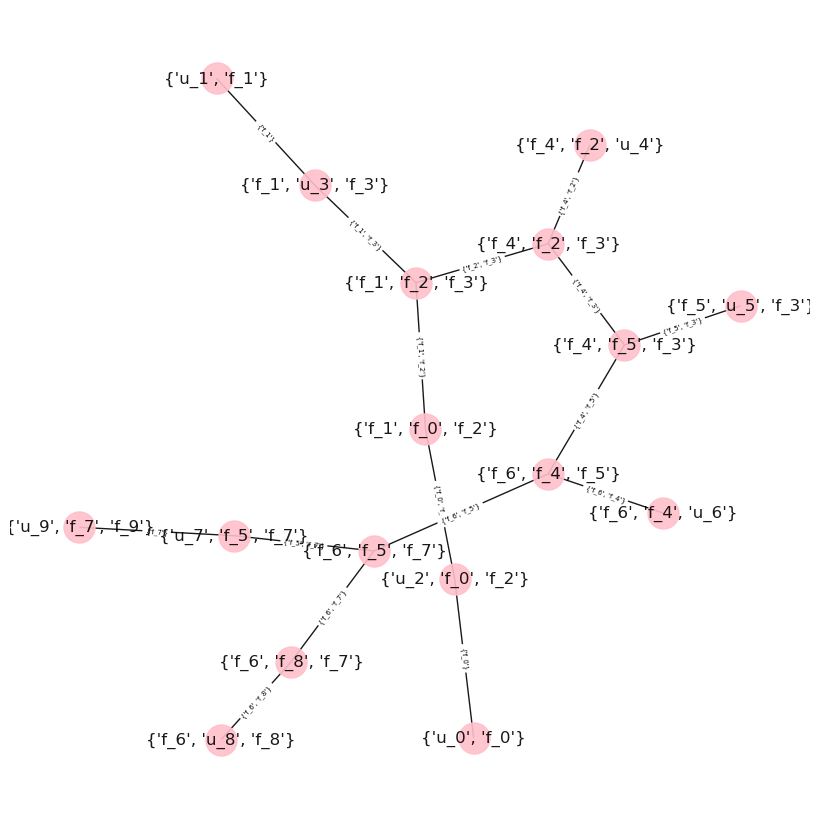

In [10]:
c_tree = c_inference_graph.with_elimination_ordering().as_cluster_tree().graph

plt.figure(figsize=(8,8)) 
pos = nx.spring_layout(c_tree)
nx.draw(c_tree, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: c_tree.nodes[node]["variables"] for node in c_tree.nodes()})
nx.draw_networkx_edge_labels(c_tree, pos, edge_labels={edge: c_tree.edges[edge]["intersection"] for edge in c_tree.edges()}, font_size=5)

Graph is chordal: True


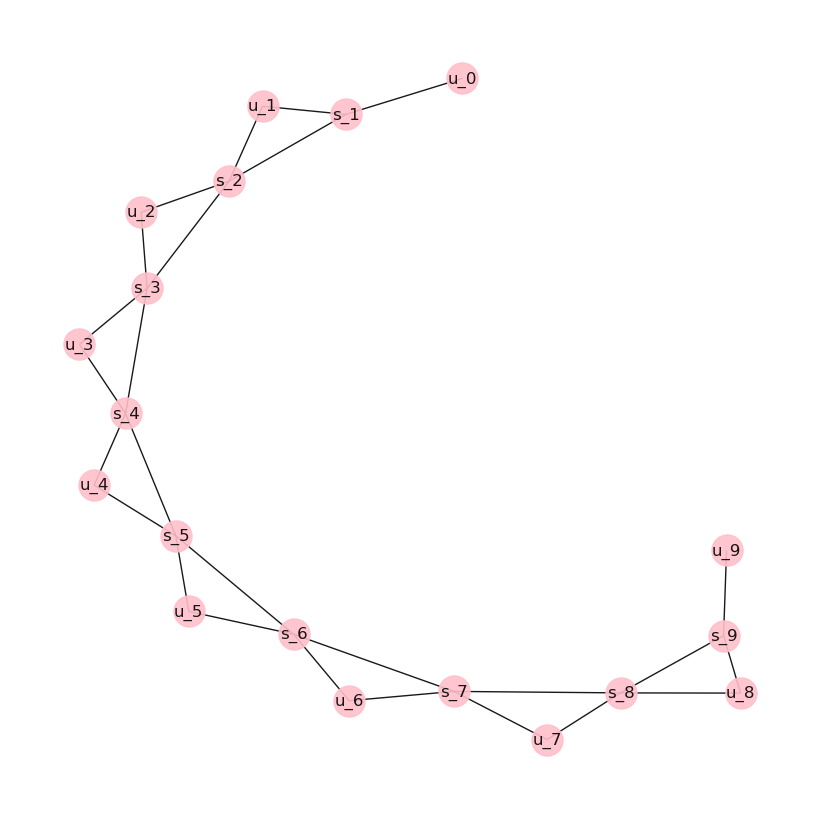

In [17]:
c_inference_graph = general_convolutional_code(length=10, state_size=4)
print(f"Graph is chordal: {c_inference_graph.is_chordal()}")
c_graph = c_inference_graph.graph

plt.figure(figsize=(8,8)) 
pos = nx.spring_layout(c_graph)
nx.draw(c_graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: node for node in c_graph.nodes()})

In [18]:
pprint(c_inference_graph.factor_groups)

{'st_0': {'s_1', 'u_0'},
 'st_1': {'s_1', 's_2', 'u_1'},
 'st_2': {'u_2', 's_3', 's_2'},
 'st_3': {'s_3', 's_4', 'u_3'},
 'st_4': {'u_4', 's_5', 's_4'},
 'st_5': {'u_5', 's_5', 's_6'},
 'st_6': {'u_6', 's_6', 's_7'},
 'st_7': {'u_7', 's_8', 's_7'},
 'st_8': {'s_9', 's_8', 'u_8'},
 'y_0': {'u_0'},
 'y_1': {'s_1', 'u_1'},
 'y_2': {'u_2', 's_2'},
 'y_3': {'s_3', 'u_3'},
 'y_4': {'u_4', 's_4'},
 'y_5': {'u_5', 's_5'},
 'y_6': {'u_6', 's_6'},
 'y_7': {'u_7', 's_7'},
 'y_8': {'s_8', 'u_8'},
 'y_9': {'s_9', 'u_9'}}


Graph was already chordally complete, max factor weight is 9.
{'s_1'}
{'s_9'}
{'s_9'}
{'s_2', 'u_1'}
{'s_2'}
{'s_2'}
{'u_2', 's_3'}
{'s_3'}
{'s_3'}
{'s_4', 'u_3'}
{'s_4'}
{'s_4'}
{'u_4', 's_5'}
{'s_5'}
{'s_5'}
{'u_5', 's_6'}
{'s_6'}
{'s_6'}
{'u_6', 's_7'}
{'s_7'}
{'s_7'}
{'u_7', 's_8'}
{'s_8'}
{'s_8'}
{'s_9', 'u_8'}
{'u_8'}
{'u_8'}


{(0, 2): Text(0.9128733878415016, -0.19608207681575876, "{'s_1'}"),
 (1, 16): Text(-0.8235721660142217, 0.4931719820710597, "{'s_9'}"),
 (2, 4): Text(0.7083535010500417, -0.26620405078361675, "{'s_2'}"),
 (4, 6): Text(0.4610962178183746, -0.28440140582284523, "{'s_3'}"),
 (6, 8): Text(0.20028935623996832, -0.2488399264640972, "{'s_4'}"),
 (8, 10): Text(-0.05398195859525327, -0.15872512463892813, "{'s_5'}"),
 (10, 12): Text(-0.2886282356901571, -0.021370357092118424, "{'s_6'}"),
 (12, 14): Text(-0.49641548105040134, 0.1460366252064727, "{'s_7'}"),
 (14, 16): Text(-0.6735055063673447, 0.32602425641065613, "{'s_8'}")}

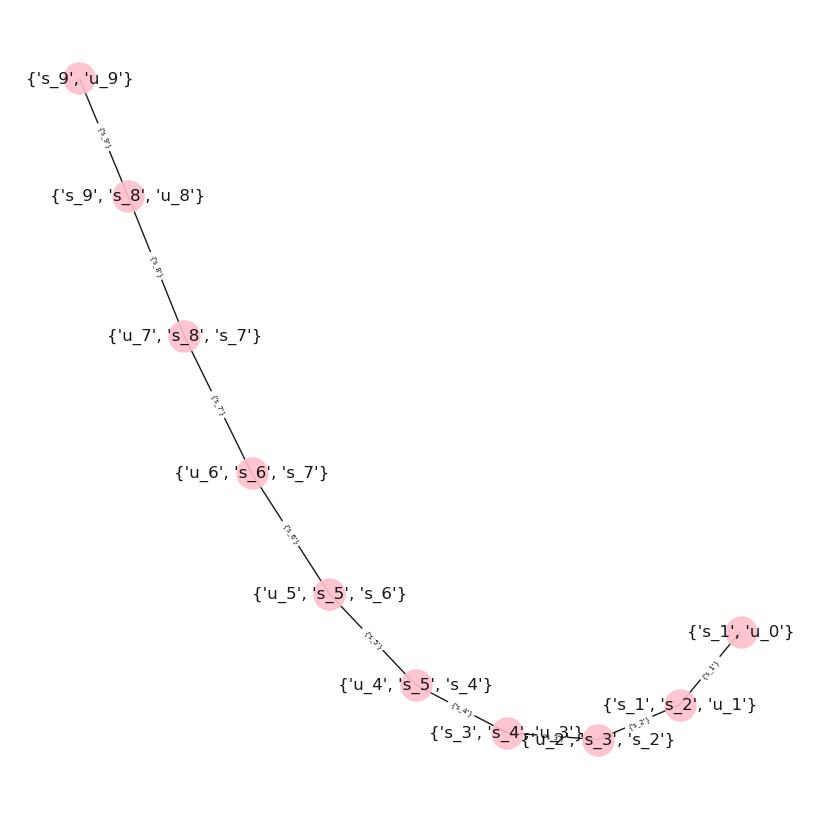

In [19]:
c_tree = c_inference_graph.with_elimination_ordering().as_cluster_tree().graph

plt.figure(figsize=(8,8)) 
pos = nx.spring_layout(c_tree)
nx.draw(c_tree, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: c_tree.nodes[node]["variables"] for node in c_tree.nodes()})
nx.draw_networkx_edge_labels(c_tree, pos, edge_labels={edge: c_tree.edges[edge]["intersection"] for edge in c_tree.edges()}, font_size=5)

Graph is chordal: False
Graph2 is chordal: False


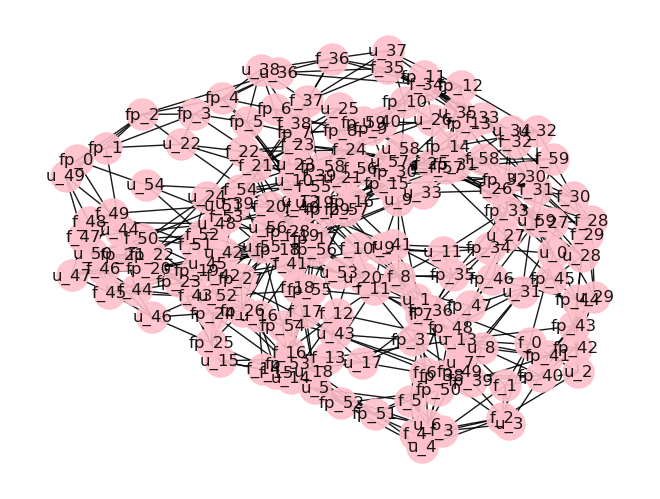

In [3]:
import torch
length=60

rng = np.random.default_rng(seed=1234)
permutation = rng.permutation(length)
interleaver = FixedPermuteInterleaver(length, permutation=torch.from_numpy(permutation))
encoder = turbo_155_7_00(length, interleaver=interleaver)
nonrecursive_dependencies_noni = infer_depencies(encoder.noninterleaved_encoder.table)
recursive_dependencies_noni = infer_depencies(encoder.noninterleaved_encoder.feedback[:, None])[0]
nonrecursive_dependencies_i = infer_depencies(encoder.interleaved_encoder.table)
recursive_dependencies_i = infer_depencies(encoder.interleaved_encoder.feedback[:, None])[0]

t_inference_graph = recursive_dependency_turbo_graph(
    interleaver.permutation, 
    nonrecursive_dependencies_noni=nonrecursive_dependencies_noni,
    recursive_dependencies_noni=recursive_dependencies_noni,
    nonrecursive_dependencies_i=nonrecursive_dependencies_i,
    recursive_dependencies_i=recursive_dependencies_i,
    systematic=True
)
gt_inference_graph = general_turbo_graph(interleaver.permutation, state_size=2)
print(f"Graph is chordal: {t_inference_graph.is_chordal()}")
print(f"Graph2 is chordal: {gt_inference_graph.is_chordal()}")

t_graph = t_inference_graph.graph
pos = nx.spring_layout(t_graph)
nx.draw(t_graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: node for node in t_graph.nodes()})

In [5]:
t_inference_graph = t_inference_graph.with_elimination_ordering(sample_thresh=5, tries=50, seed=15413)
gt_inference_graph = gt_inference_graph.with_elimination_ordering(sample_thresh=5, tries=50, seed=15413)


15413


100%|██████████| 50/50 [01:58<00:00,  2.37s/it, best=42]


15413


100%|██████████| 50/50 [00:41<00:00,  1.21it/s, best=35]


Graph is chordal: False
Graph2 is chordal: False


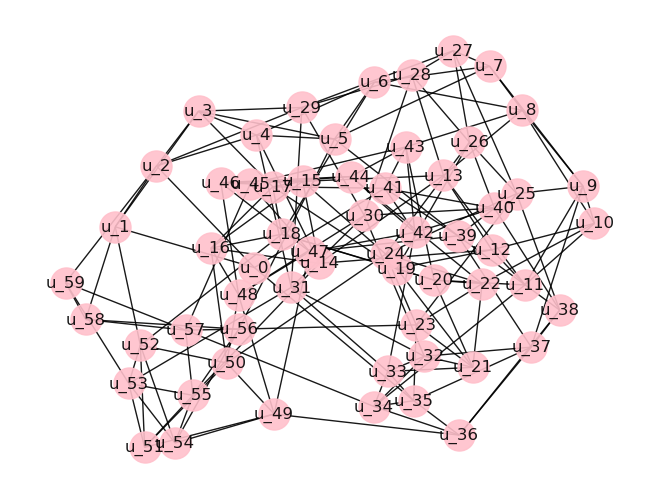

In [17]:
import torch
length=60

rng = np.random.default_rng(seed=1234)
permutation = rng.permutation(length)
interleaver = FixedPermuteInterleaver(length, permutation=torch.from_numpy(permutation))
encoder = turbo_755_1_00(length, interleaver=interleaver)
t_inference_graph = nonrecursive_dependency_turbo_graph(interleaver.permutation, nonrecursive_dependencies_noni=encoder.noninterleaved_encoder.generator, nonrecursive_dependencies_i=encoder.interleaved_encoder.generator)
nt_inference_graph = nonrecursive_turbo_graph(interleaver.permutation, window=encoder.noninterleaved_encoder.window)
print(f"Graph is chordal: {t_inference_graph.is_chordal()}")
print(f"Graph2 is chordal: {nt_inference_graph.is_chordal()}")

t_graph = t_inference_graph.graph
pos = nx.spring_layout(t_graph)
nx.draw(t_graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: node for node in t_graph.nodes()})

In [18]:
nx.is_isomorphic(t_inference_graph.graph, nt_inference_graph.graph)

False

In [5]:
t_inference_graph = t_inference_graph.with_elimination_ordering(sample_thresh=3, tries=50, seed=15413)
nt_inference_graph = nt_inference_graph.with_elimination_ordering(sample_thresh=3, tries=50, seed=15413)


15413


100%|██████████| 50/50 [00:07<00:00,  6.67it/s, best=20]


15413


100%|██████████| 50/50 [00:12<00:00,  3.97it/s, best=24]


40
None


{(0, 1): Text(-0.4846736466326056, -0.45576962086001893, '4'),
 (1, 23): Text(-0.37289950880162026, -0.34473914539898287, '5'),
 (2, 34): Text(0.32706632180264994, -0.07939724375797434, '4'),
 (3, 13): Text(-0.7245302521918674, -0.31245410821215813, '5'),
 (4, 9): Text(-0.2030154672771884, 0.8527325911515075, '5'),
 (5, 12): Text(-0.0005982989791140647, 0.6005746486478918, '5'),
 (6, 13): Text(-0.7264818824931334, -0.26551677107301463, '5'),
 (7, 24): Text(0.779362457813116, 0.07091626764588371, '5'),
 (8, 11): Text(-0.11204608065791427, -0.9364010032367567, '5'),
 (9, 30): Text(-0.09196166234359432, 0.7531939549045273, '6'),
 (10, 27): Text(-0.09297312524907655, 0.4201088330713907, '6'),
 (11, 15): Text(-0.11189231440936884, -0.7971516217182906, '6'),
 (12, 27): Text(-0.03196421884347557, 0.46801508389598623, '7'),
 (13, 18): Text(-0.5759575599235621, -0.2809111107270743, '7'),
 (14, 31): Text(0.12960316605951744, 0.6374646565177766, '5'),
 (15, 22): Text(-0.11400800542238129, -0.6437

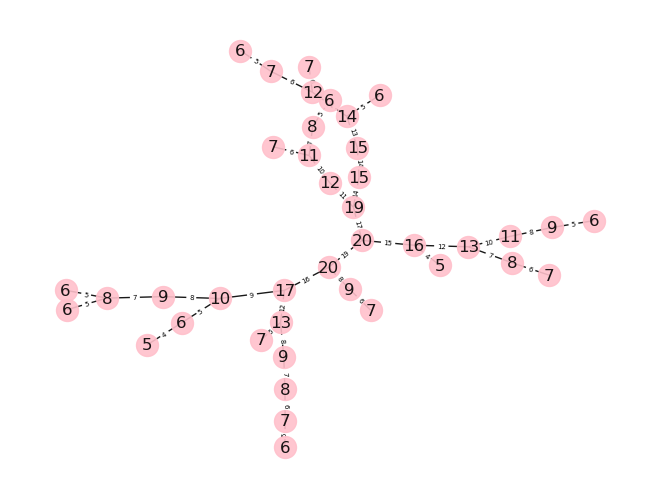

In [6]:
ct_tree = t_inference_graph.as_cluster_tree().graph
print(len(ct_tree))
print(check_cluster_tree(ct_tree))
pos = nx.spring_layout(ct_tree)
# node_labels = {node: nt_tree.nodes[node]["variables"] for node in nt_tree.nodes()}
node_labels = {node: len(ct_tree.nodes[node]["variables"]) for node in ct_tree.nodes()}
# edge_labels = {edge: nt_tree.edges[edge]["intersection"] for edge in nt_tree.edges()}
edge_labels = {edge: len(ct_tree.edges[edge]["intersection"]) for edge in ct_tree.edges()}
nx.draw(ct_tree, pos, edge_color='black', width=1, linewidths=1,
    node_size=250, node_color='pink', alpha=0.9, labels=node_labels)
nx.draw_networkx_edge_labels(ct_tree, pos, edge_labels=edge_labels, font_size=5)

36
None


{(0, 9): Text(0.0325882501596749, -0.943573403146148, '6'),
 (1, 8): Text(0.9328312487995544, 0.621484103822888, '5'),
 (2, 26): Text(-0.5246381964385453, 0.26613241670743, '6'),
 (3, 24): Text(-0.3791738013892926, -0.5667113633397094, '7'),
 (4, 10): Text(0.7521242444245464, 0.6097331571558433, '6'),
 (5, 33): Text(-0.4970306353250167, -0.22698975282161826, '7'),
 (6, 27): Text(0.32993227095563005, 0.1062093654285088, '7'),
 (7, 13): Text(0.396837513801344, 0.5630334224412334, '7'),
 (8, 10): Text(0.7972720505846259, 0.570394846432448, '9'),
 (9, 18): Text(-0.0720257973940908, -0.830732159602702, '8'),
 (10, 12): Text(0.6612602107210983, 0.5035278921002052, '10'),
 (11, 25): Text(-0.7124838733825615, 0.2953551294888599, '7'),
 (12, 21): Text(0.521234991583915, 0.41594954380035976, '10'),
 (13, 21): Text(0.4268500916325391, 0.436639545125359, '9'),
 (14, 18): Text(-0.1436920163427255, -0.8345470569046216, '8'),
 (15, 19): Text(0.28629429003028894, -0.11946247208779269, '8'),
 (16, 25):

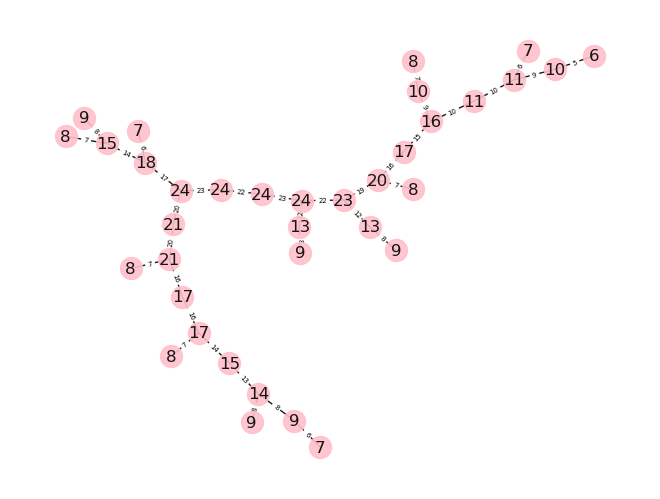

In [7]:
ct_tree = nt_inference_graph.as_cluster_tree().graph
print(len(ct_tree))
print(check_cluster_tree(ct_tree))
pos = nx.spring_layout(ct_tree)
# node_labels = {node: nt_tree.nodes[node]["variables"] for node in nt_tree.nodes()}
node_labels = {node: len(ct_tree.nodes[node]["variables"]) for node in ct_tree.nodes()}
# edge_labels = {edge: nt_tree.edges[edge]["intersection"] for edge in nt_tree.edges()}
edge_labels = {edge: len(ct_tree.edges[edge]["intersection"]) for edge in ct_tree.edges()}
nx.draw(ct_tree, pos, edge_color='black', width=1, linewidths=1,
    node_size=250, node_color='pink', alpha=0.9, labels=node_labels)
nx.draw_networkx_edge_labels(ct_tree, pos, edge_labels=edge_labels, font_size=5)

Graph is chordal: False


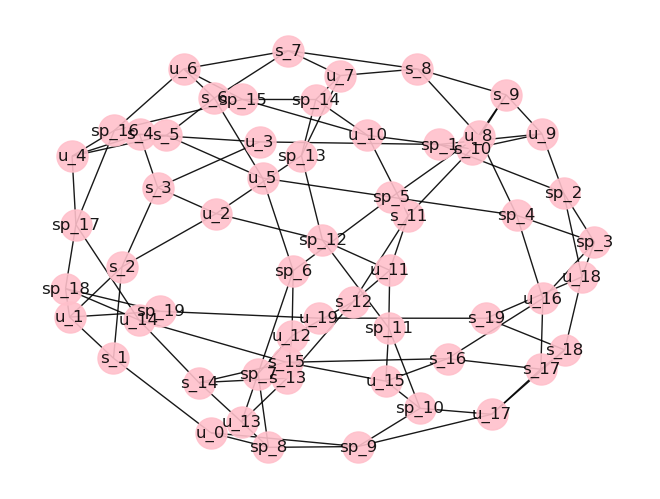

In [7]:
length=20
rng = np.random.default_rng(seed=1234)
permutation = rng.permutation(length)
t_inference_graph = general_turbo_graph(permutation, state_size=4)
print(f"Graph is chordal: {t_inference_graph.is_chordal()}")

t_graph = t_inference_graph.graph
pos = nx.spring_layout(t_graph)
nx.draw(t_graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: node for node in t_graph.nodes()})

In [8]:
t_inference_graph = t_inference_graph.with_elimination_ordering(sample_thresh=3, tries=50, seed=15413)


100%|██████████| 50/50 [00:03<00:00, 12.65it/s, best=23]


38
None


{(0, 18): Text(-0.9397491241976446, -0.7592491079210731, '3'),
 (1, 5): Text(0.690760267603825, 0.8923868432766421, '3'),
 (2, 4): Text(-0.5026661498342921, 0.9356668970266637, '3'),
 (3, 6): Text(0.9194756757533592, -0.572748347456545, '3'),
 (4, 7): Text(-0.42386575316180464, 0.8068346400269594, '4'),
 (5, 8): Text(0.6284767629031998, 0.7699342083637346, '4'),
 (6, 11): Text(0.7763990980125388, -0.541796719139446, '4'),
 (7, 9): Text(-0.34057186238094855, 0.6683211630761713, '5'),
 (8, 10): Text(0.5564276521653599, 0.6445000637680166, '5'),
 (9, 12): Text(-0.2583130446307195, 0.5268823860450601, '6'),
 (10, 14): Text(0.47576950600705814, 0.5247965135531221, '6'),
 (11, 13): Text(0.623172322230146, -0.5190942343988555, '5'),
 (12, 16): Text(-0.18666325056520672, 0.3881002348134833, '7'),
 (13, 15): Text(0.4697496583893255, -0.497313267775888, '6'),
 (14, 17): Text(0.38599209678553176, 0.41294382561008597, '7'),
 (15, 19): Text(0.3209302005166276, -0.468961444881323, '7'),
 (16, 22): T

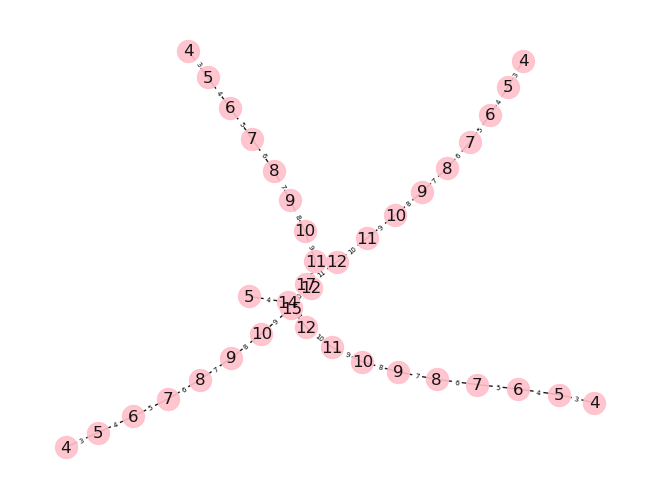

In [10]:
ct_tree = t_inference_graph.as_cluster_tree().graph
print(len(ct_tree))
print(check_cluster_tree(ct_tree))
pos = nx.spring_layout(ct_tree)
# node_labels = {node: nt_tree.nodes[node]["variables"] for node in nt_tree.nodes()}
node_labels = {node: len(ct_tree.nodes[node]["variables"]) for node in ct_tree.nodes()}
# edge_labels = {edge: nt_tree.edges[edge]["intersection"] for edge in nt_tree.edges()}
edge_labels = {edge: len(ct_tree.edges[edge]["intersection"]) for edge in ct_tree.edges()}
nx.draw(ct_tree, pos, edge_color='black', width=1, linewidths=1,
    node_size=250, node_color='pink', alpha=0.9, labels=node_labels)
nx.draw_networkx_edge_labels(ct_tree, pos, edge_labels=edge_labels, font_size=5)

Graph is chordal: True


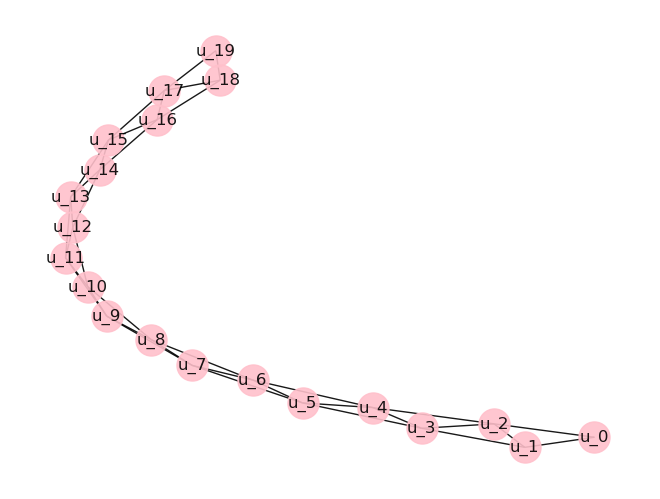

In [11]:
nc_inference_graph = nonsystematic_convolutional_code(length=20, window=3)
print(f"Graph is chordal: {nc_inference_graph.is_chordal()}")
nc_graph = nc_inference_graph.graph

pos = nx.spring_layout(nc_graph)
nx.draw(nc_graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: node for node in nc_graph.nodes()})

Graph was already chordally complete, max factor weight is 3.


{(0, 1): Text(0.4629714279152678, -0.25644218670378793, "{'u_1', 'u_2'}"),
 (1, 2): Text(0.5998905191710426, -0.2493337213141295, "{'u_2', 'u_3'}"),
 (2, 3): Text(0.7072206611987606, -0.17242059653603597, "{'u_4', 'u_3'}"),
 (3, 4): Text(0.7424237400091396, -0.0485501170087298, "{'u_4', 'u_5'}"),
 (4, 5): Text(0.6872060496600954, 0.06991186991672535, "{'u_6', 'u_5'}"),
 (5, 6): Text(0.5634831064408412, 0.13835392303476943, "{'u_6', 'u_7'}"),
 (6, 7): Text(0.40996761963964923, 0.14584525366981835, "{'u_7', 'u_8'}"),
 (7, 8): Text(0.25383306998367494, 0.10291335141285718, "{'u_9', 'u_8'}"),
 (8, 9): Text(0.1048433261682374, 0.02963272836414278, "{'u_9', 'u_10'}"),
 (9,
  10): Text(-0.04044559044082914, -0.048620321066044594, "{'u_10', 'u_11'}"),
 (10,
  11): Text(-0.19068652158214772, -0.10145854115133147, "{'u_11', 'u_12'}"),
 (11, 12): Text(-0.3463721043099302, -0.1062691366285459, "{'u_12', 'u_13'}"),
 (12,
  13): Text(-0.49442391605695585, -0.06710782521001396, "{'u_14', 'u_13'}"),
 

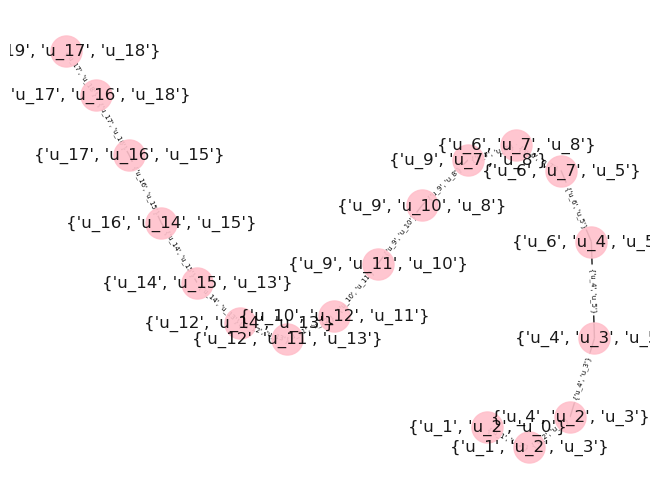

In [12]:
nc_tree = nc_inference_graph.with_elimination_ordering().as_cluster_tree().graph

pos = nx.spring_layout(nc_tree)
nx.draw(nc_tree, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: nc_tree.nodes[node]["variables"] for node in nc_tree.nodes()})
nx.draw_networkx_edge_labels(nc_tree, pos, 
    edge_labels={edge: nc_tree.edges[edge]["intersection"] for edge in nc_tree.edges()}, font_size=5)

[31 32 26  2 39  0 37 34 13 12 27 29 21  5  3 33 25 38 36 15 28 22 16 11
 14 18 20  9  8 30 23 10  7  6 35 24  4 19 17  1]
4
Graph is chordal: False


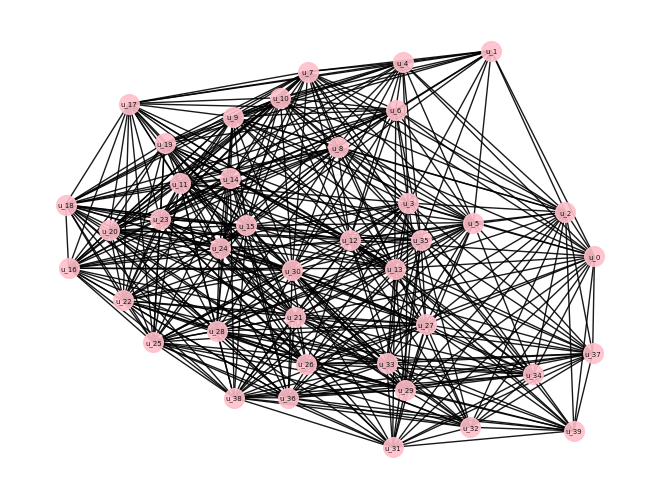

In [27]:
length=40
# rng = np.random.default_rng(seed=3634)
# rng = np.random.default_rng(seed=15234)
# permutation = np.arange(length)
rng = np.random.default_rng(seed=524) # This has the lowest decoding complexity
# rng = np.random.default_rng(seed=902)
permutation = rng.permutation(length) # Generally a random permutation usually gets to 11
print(permutation)
# permutation = np.roll(np.arange(length), 5) # Rolling seems to produce max factor sizes of 3

# swap = [15, 39]
# permutation[swap] = permutation[swap[::-1]]  # Swapping seems to produce max factor sizes of 4
# swap = np.array([3, 0, 5, 7, 9]) # This one gets to 5
# permutation[swap] = permutation[swap[np.random.permutation(len(swap))]]
# swap = 2 * np.arange(length // 2)
# permutation[swap] = permutation[swap[np.random.permutation(len(swap))]] # This one gets to 11
# permutation[swap] = permutation[np.roll(swap, 1)]  # This gets to 5
# permutation[swap] = permutation[np.roll(swap, 2)]  # This gets to 7
# permutation[swap] = permutation[np.roll(swap, 3)]  # This gets to 9
# permutation[swap] = permutation[np.roll(swap, 4)]  # This gets to 11
# permutation[swap] = permutation[np.roll(swap, 10)]  # This gets to 6
# permutation[swap] = permutation[np.roll(swap, 7)]  # This gets to 6
window = 9
delay = (window - 1) - ((window - 1) // 2)
print(delay)
nt_inference_graph = nonrecursive_turbo_graph(permutation, window=window, delay=delay)
print(f"Graph is chordal: {nt_inference_graph.is_chordal()}")

nt_graph = nt_inference_graph.graph
pos = nx.spring_layout(nt_graph)
nx.draw(nt_graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=200, node_color='pink', alpha=0.9, labels={node: node for node in nt_graph.nodes()}, font_size=5)

In [28]:
nt_inference_graph = nt_inference_graph.with_elimination_ordering(sample_thresh=3, tries=100, seed=15413)



15413


100%|██████████| 100/100 [00:14<00:00,  6.94it/s, best=23]


In [14]:
(100 * 32 * 2 ** 23) / (2 ** 30)

25.0

34
None


{(0, 20): Text(0.31428277858241493, 0.8331962883259791, '2'),
 (1, 6): Text(0.09149734151475615, -0.8811981900050635, '3'),
 (1, 3): Text(0.21988591349033632, -0.9591037163531548, '2'),
 (2, 18): Text(-0.14682277951394956, -0.8259821415791578, '3'),
 (4, 24): Text(-0.3264135603135751, -0.6794126085301088, '3'),
 (5, 26): Text(-0.46319745802407375, -0.48067876470736426, '3'),
 (6, 18): Text(-0.05828466226291984, -0.8045246016387093, '3'),
 (7, 27): Text(-0.5505371642212608, -0.209089159823862, '3'),
 (8, 28): Text(-0.506063079782685, -0.003690294808874863, '3'),
 (9, 32): Text(-0.3667769662909082, 0.1966868046411571, '3'),
 (10, 32): Text(-0.3113946989501413, 0.11816016183388522, '3'),
 (11, 27): Text(-0.5386808021108117, -0.25110310251417767, '3'),
 (12, 35): Text(-0.023910628909610654, 0.3468970052041592, '3'),
 (13, 34): Text(-0.08851277427230178, 0.3168825489364893, '3'),
 (14, 31): Text(0.24254063785947194, 0.17147399799386664, '3'),
 (15, 35): Text(0.024774246221741333, 0.37969352

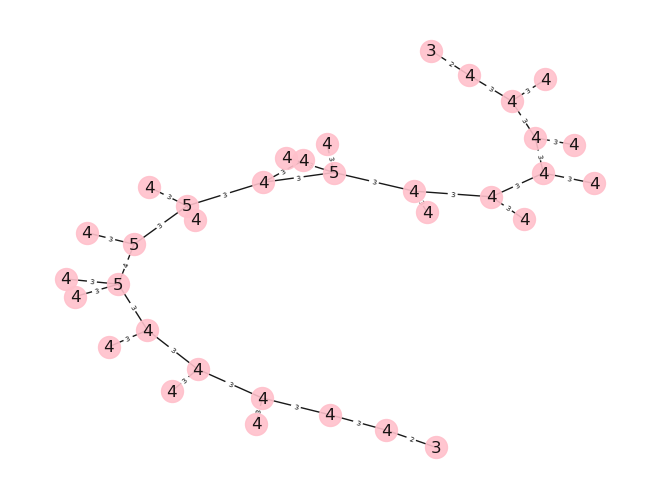

In [109]:
nt_tree = nt_inference_graph.as_cluster_tree().graph
print(len(nt_tree))
print(check_cluster_tree(nt_tree))
pos = nx.spring_layout(nt_tree)
# node_labels = {node: nt_tree.nodes[node]["variables"] for node in nt_tree.nodes()}
node_labels = {node: len(nt_tree.nodes[node]["variables"]) for node in nt_tree.nodes()}
# edge_labels = {edge: nt_tree.edges[edge]["intersection"] for edge in nt_tree.edges()}
edge_labels = {edge: len(nt_tree.edges[edge]["intersection"]) for edge in nt_tree.edges()}
nx.draw(nt_tree, pos, edge_color='black', width=1, linewidths=1,
    node_size=250, node_color='pink', alpha=0.9, labels=node_labels)
nx.draw_networkx_edge_labels(nt_tree, pos, edge_labels=edge_labels, font_size=5)

In [19]:
dir_nt_tree = nt_tree.to_directed()
node_labels = {node: dir_nt_tree.nodes[node]["variables"] for node in dir_nt_tree.nodes()}
edge_labels = {edge: dir_nt_tree.edges[edge]["intersection"] for edge in dir_nt_tree.edges()}
for n, x in  node_labels.items():
    print(f"{n}: {x}")
for e, x in edge_labels.items():
    print(f"{e}: {x}")

0: {'u_28', 'u_20', 'u_11', 'u_27', 'u_25', 'u_26', 'u_29', 'u_0', 'u_24', 'u_15'}
1: {'u_8', 'u_14', 'u_11', 'u_6', 'u_23', 'u_7', 'u_9', 'u_13', 'u_10', 'u_24', 'u_12'}
2: {'u_14', 'u_20', 'u_11', 'u_27', 'u_26', 'u_25', 'u_23', 'u_22', 'u_29', 'u_0', 'u_24', 'u_15'}
3: {'u_20', 'u_14', 'u_11', 'u_18', 'u_27', 'u_25', 'u_23', 'u_22', 'u_13', 'u_29', 'u_0', 'u_24', 'u_15'}
4: {'u_8', 'u_5', 'u_14', 'u_11', 'u_6', 'u_23', 'u_4', 'u_7', 'u_9', 'u_13', 'u_24', 'u_12', 'u_15'}
5: {'u_5', 'u_19', 'u_2', 'u_4', 'u_22', 'u_3', 'u_17', 'u_0', 'u_1'}
6: {'u_5', 'u_14', 'u_11', 'u_6', 'u_23', 'u_9', 'u_7', 'u_13', 'u_4', 'u_0', 'u_24', 'u_12', 'u_15'}
7: {'u_5', 'u_19', 'u_2', 'u_6', 'u_4', 'u_22', 'u_16', 'u_3', 'u_17', 'u_21', 'u_0', 'u_12'}
8: {'u_5', 'u_19', 'u_20', 'u_14', 'u_18', 'u_6', 'u_4', 'u_22', 'u_16', 'u_13', 'u_3', 'u_17', 'u_21', 'u_0', 'u_12', 'u_15'}
9: {'u_5', 'u_19', 'u_21', 'u_20', 'u_14', 'u_18', 'u_6', 'u_23', 'u_4', 'u_7', 'u_22', 'u_13', 'u_3', 'u_17', 'u_24', 'u_0', 'u

Graph is chordal: False
Graph is chordal: False


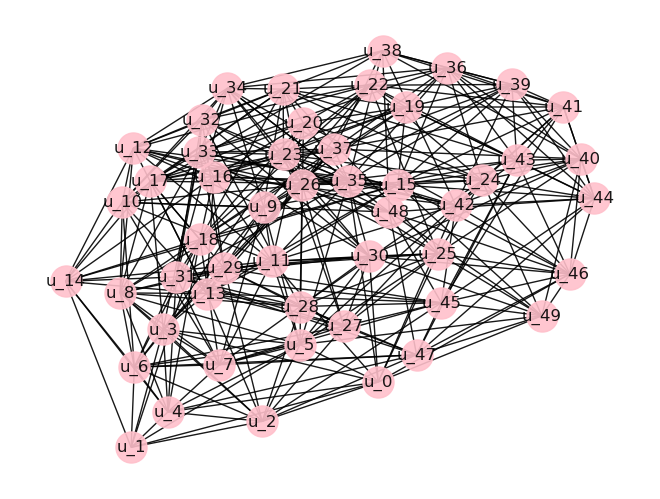

In [14]:
import torch
length=50

rng = np.random.default_rng(seed=1234)
permutation = rng.permutation(length)
interleaver = FixedPermuteInterleaver(length, permutation=torch.from_numpy(permutation))
encoder = turboae_binary_exact_nobd(length, interleaver=interleaver)
nonrecursive_dependencies_noni = infer_depencies(encoder.noninterleaved_encoder.table)
nonrecursive_dependencies_i = infer_depencies(encoder.interleaved_encoder.table)
t_inference_graph = nonrecursive_dependency_turbo_graph(
    interleaver.permutation, 
    nonrecursive_dependencies_noni=nonrecursive_dependencies_noni, 
    nonrecursive_dependencies_i=nonrecursive_dependencies_i
)
nt_inference_graph = nonrecursive_turbo_graph(interleaver.permutation, window=encoder.noninterleaved_encoder.window)
print(f"Graph is chordal: {t_inference_graph.is_chordal()}")
print(f"Graph is chordal: {nt_inference_graph.is_chordal()}")

t_graph = t_inference_graph.graph
pos = nx.spring_layout(t_graph)
nx.draw(t_graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels={node: node for node in t_graph.nodes()})

In [16]:
nx.is_isomorphic(t_inference_graph.graph, nt_inference_graph.graph)

True

In [15]:
t_inference_graph = t_inference_graph.with_elimination_ordering(sample_thresh=3, tries=100, seed=15413)
nt_inference_graph = nt_inference_graph.with_elimination_ordering(sample_thresh=3, tries=100, seed=15413)


15413


100%|██████████| 100/100 [00:19<00:00,  5.12it/s, best=24]


15413


100%|██████████| 100/100 [00:19<00:00,  5.15it/s, best=24]
